In [3]:
import numpy as np
from datascience import *

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# 1) Find the amount of seconds in June

In [5]:
seconds_in_june=60*60*24*30
seconds_in_june

2592000

In [6]:
#Finding the number of seconds between 1 June at noon and 14 August at 0930
seconds_aug_14=(2400-930)*60
seconds_jun_1=1200*60
seconds_between=(17+30+31+30+31+31+28+3130+31)*60*60*24
total_seconds=seconds_aug_14+seconds_jun_1+seconds_between
total_seconds

290377800

# 2)

In [4]:
#Save world population as table
table=Table.read_table('world_population.csv')
table

Population
2557628654
2594939877
2636772306
2682053389
2730228104
2782098943
2835299673
2891349717
2948137248
3000716593


In [5]:
#Find the population in 2015 knowing that the dataset starts in 1950
table.take(65)

Population
7256490011


In [7]:
#Find diffreence in population between 1950 and 2015
array=table.column('Population')
diff=array.item(65)-array.item(0)
diff

4698861357

In [12]:
#Find the average annual growth rate over that same time period
growthRate=(array.item(65)/array.item(0))**(1/(2015-1950))-1
growthRate                                

0.01617270380658975

# 3)

In [20]:
#Load in the titanic passenger data and save it as table
url='https://raw.githubusercontent.com/oikobill/Kaggle/master/Titanic/data/train.csv'
titanic=Table.read_table(url)


## Part A

In [21]:
#Relabel Pclass to passenger_class
titanic.relabel('Pclass','passenger_class')


PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,nan,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,nan,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,nan,S
6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.4583,nan,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,nan,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,nan,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,nan,C


## Part B

In [22]:
#Add new column 'family size' that adds together number of siblings and spouses to number of children
titanic.with_column('family_size',titanic.apply(lambda x, y: x+y, 'SibSp', 'Parch'))


PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,nan,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,nan,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,nan,S,0
6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.4583,nan,Q,0
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,0
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,nan,S,4
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,nan,S,2
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,nan,C,1


## Part C

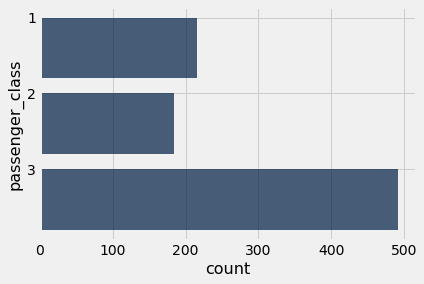

In [23]:
#create barplot of passengers broken down by passenger class
pass_class=titanic.group('passenger_class')
pass_class.barh('passenger_class')

## Part D

In [24]:
#Sort data and show youngest 5 passengers
titanic.sort('Age').show(5)

PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,nan,C
756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5,nan,S
470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,nan,C
645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,nan,C
79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29,nan,S


## Part E

In [27]:
#Sort from oldest to youngest and show oldest 5 passengers
tita=titanic.where('Age',are.strictly_between(0,999))
tita.sort('Age',1).show(5)

PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80,0,0,27042,30,A23,S
852,0,3,"Svensson, Mr. Johan",male,74,0,0,347060,7.775,nan,S
494,0,1,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,nan,C
97,0,1,"Goldschmidt, Mr. George B",male,71,0,0,PC 17754,34.6542,A5,C
117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.75,nan,Q


## Part F

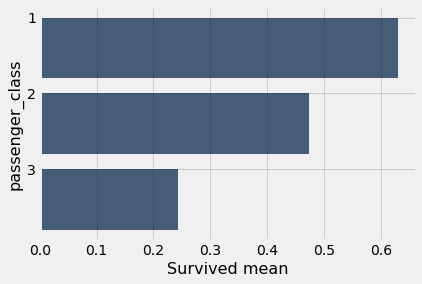

In [45]:
#Find survival rate of passengers based on class
sur=titanic.select('Survived','passenger_class')
sur.group('passenger_class',np.mean).barh('passenger_class')

## Part G

C:\Users\C20Ben.Thompson\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


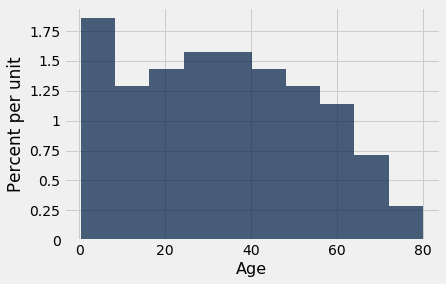

In [64]:
#Find percent of survivors based on age.
surage=titanic.select('Survived','Age').where('Age',are.strictly_between(0,999))
surage.group('Age',np.mean).hist('Age')

## Part H

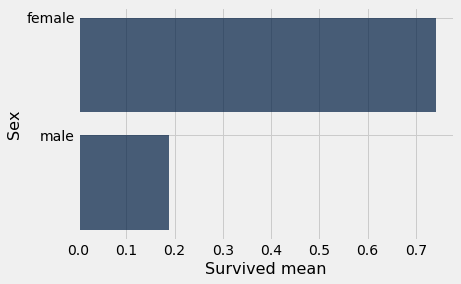

In [66]:
#find survival rate based on sex
sursex=titanic.select('Survived','Sex')
sursex.group('Sex',np.mean).barh('Sex')